##Importing libraries


In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

##Reading Traning and testing datasets


In [113]:
train=pd.read_csv('Training.csv')
test=pd.read_csv('Test.csv')

In [114]:
train.head(5)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [115]:
test.head(5)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to se...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [116]:
data_set=train.append(test,ignore_index=True) 
data_set.shape

(49159, 3)

##Delete Function

In [117]:
def delete(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

##Removing @users


In [118]:
data_set['ntweet'] = np.vectorize(delete)(data_set['tweet'], "@[\w]*") 
data_set.head(5)

,id,label,tweet,ntweet
0,1,0.0,@user when a father is dysfunctional and is so...,when a father is dysfunctional and is so self...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


##Removing Short words


In [119]:
data_set['ntweet'] = data_set['ntweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

##Removing Punctuations, Numbers, and Special Characters


---



In [120]:
data_set['ntweet'] = data_set['ntweet'].str.replace("[^a-zA-Z#]", " ") 
data_set.head(5)

,id,label,tweet,ntweet
0,1,0.0,@user when a father is dysfunctional and is so...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can t cause they don t off...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time ur ...
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


##Text Normalization

tokenizing 

In [121]:
tokenized_tweet = data_set['ntweet'].apply(lambda x: x.split()) 
tokenized_tweet.head(5)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can, t, cause, they, d...
2                              [bihday, your, majesty]
3                 [#model, love, take, with, time, ur]
4                   [factsguide, society, #motivation]
Name: ntweet, dtype: object

stemming

In [122]:
from nltk.stem.porter import * 
stemmer=PorterStemmer() 
tokenized_tweet=tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [123]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
data_set['ntweet'] = tokenized_tweet

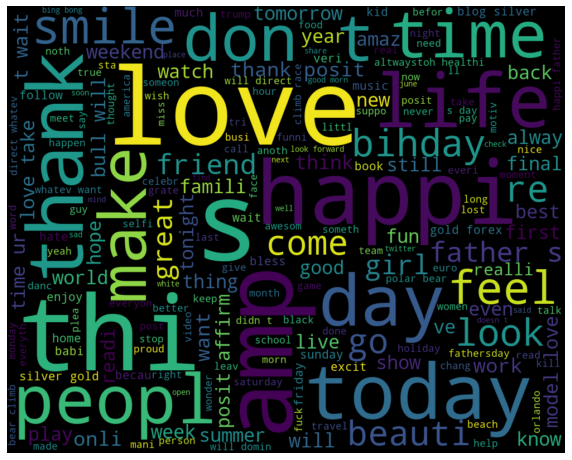

In [124]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in data_set['ntweet']]) 
wordcloud = WordCloud(width=1000, height=800, random_state=30, max_font_size=200).generate(all_words) 
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

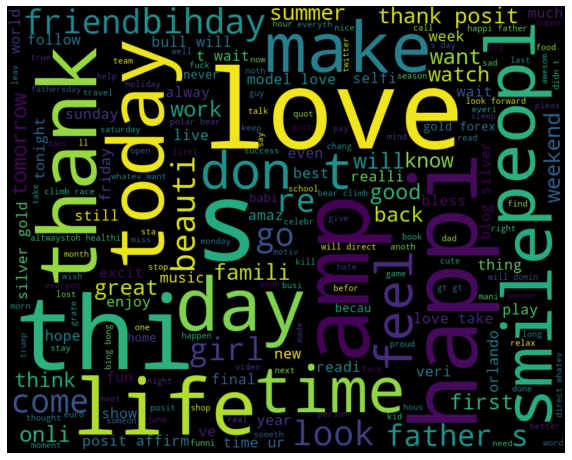

In [125]:
normal_words =' '.join([text for text in data_set['ntweet'][data_set['label'] == 0]]) 
wordcloud = WordCloud(width=1000, height=800, random_state=30, max_font_size=200).generate(normal_words)
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

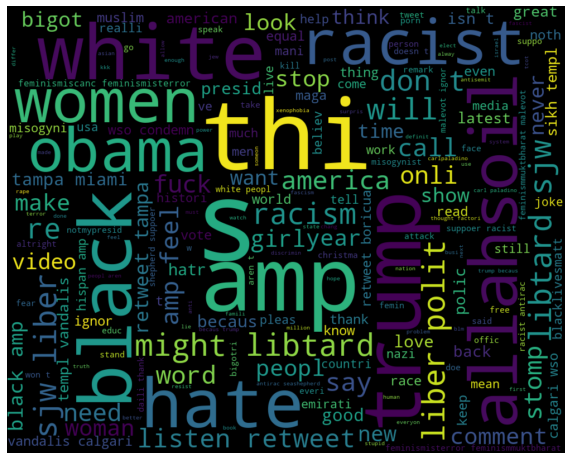

In [126]:
negative_words = ' '.join([text for text in data_set['ntweet'][data_set['label'] == 1]]) 
wordcloud = WordCloud(width=1000, height=800, random_state=30, max_font_size=200).generate(negative_words) 
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

##Finding Hashtags

In [127]:
def hashtag(tweets):
    hashtags=[]
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [128]:
positive = hashtag(data_set['ntweet'][data_set['label']==0])
negative = hashtag(data_set['ntweet'][data_set['label']==1])

In [129]:
positive = sum(positive, [])
negative = sum(negative, [])

In [130]:
positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [131]:
freq=nltk.FreqDist(positive)
d=pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


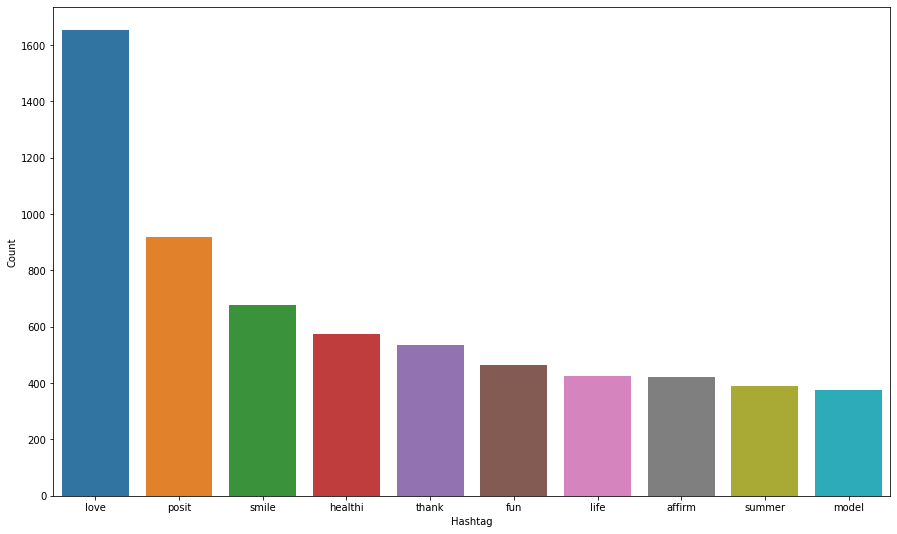

In [132]:
d=d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer 
import gensim

In [134]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(data_set['ntweet']) 
bow.shape

(49159, 1000)

In [135]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(data_set['ntweet']) 
tfidf.shape

(49159, 1000)

## Tokenization


In [136]:
tokenized_tweet = data_set['ntweet'].apply(lambda x: x.split()) 
model= gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, 
            window=5, 
            min_count=2,
            sg = 1,
            hs = 0,
            negative = 10,
            workers= 2, 
            seed = 34) 

In [137]:
model.train(tokenized_tweet, total_examples= len(data_set['ntweet']), epochs=20)

(7161671, 8318420)

In [138]:
model.wv.most_similar(positive="love")

[('cassidi', 0.5011565089225769),
 ('freind', 0.4994827210903168),
 ('corrieeeeee', 0.4953896999359131),
 ('ankara', 0.48204925656318665),
 ('brad', 0.4809781610965729),
 ('#heroesdayug', 0.47921648621559143),
 ('#belov', 0.4787229895591736),
 ('cristina', 0.4787067174911499),
 ('esp', 0.47855639457702637),
 ('#albanpilgrimag', 0.47578293085098267)]

In [139]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:                                
            continue
    if count != 0:
        vec /= count
    return vec


wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape 

(49159, 200)

In [140]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],random_state=42,test_size=0.3)

## Training


In [141]:
from sklearn.linear_model import LogisticRegression 
model= LogisticRegression()
model.fit(xtrain_bow, ytrain)

LogisticRegression()

##prediction


In [152]:
pred = model.predict(xvalid_bow)
f1_score(yvalid, pred)
prediction =model.predict_proba(xvalid_bow) 
prediction[6]

array([0.97996274, 0.02003726])

In [154]:
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) 

0.5400495458298926